In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

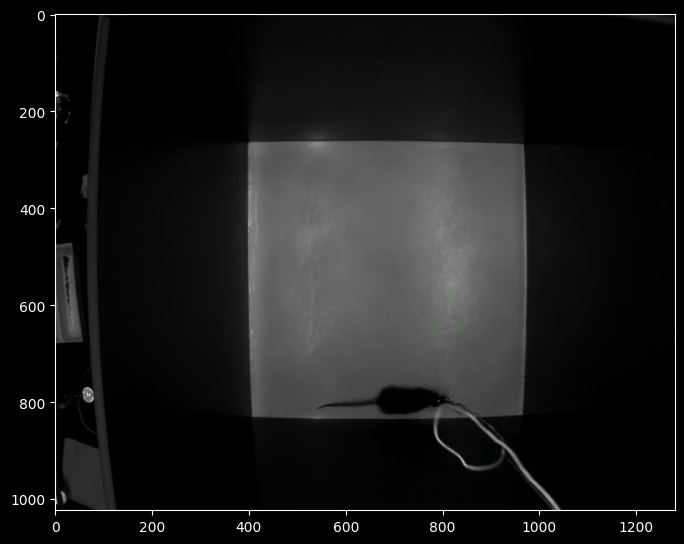

In [2]:
video_path = "/mnt/md0/shaokai/mouse_vid.mpg"
scene_frame_number = 400
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [3]:
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config( amadeus_root / "amadeusgpt/configs/template.yaml")
config['video_info']['video_file_path'] = video_path
config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = None #str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
print (config)
amadeus = AMADEUS(config)

keypoint_info:
  keypoint_file_path: null
  model_checkpoint: ''
  model_name: ''
llm_info:
  keep_last_n_messages: 2
object_info:
  load_objects_from_disk: false
video_info:
  pixels_per_cm: 8
  scene_frame_number: 400
  video_file_path: /mnt/md0/shaokai/mouse_vid.mpg



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.01 $
current total tokens 1078
The image shows a single mouse viewed from the top, positioned towards the bottom right corner of the image. The background appears to be a plain, enclosed space with a light-colored floor and darker walls. There are some objects on the left side of the image, including what looks like a syringe and some other equipment.

Here is the filled json string:

```json
{
    "description": "A single mouse viewed from the top in an enclosed space with a light-colored floor and darker walls. There are some objects on the left side of the image, including a syringe and other equipment.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["syringe", "equipment"]
}
```


In [4]:
from IPython.display import Markdown, display
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print(qa_message['pose_video'])
    display(Markdown(str(qa_message['function_rets'])))

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.09 $
current total tokens 12819


To plot the trajectory of the animal using the animal center and color it by time, we can use the `get_keypoints` function to retrieve the keypoints data. Specifically, we will focus on the 'mouse_center' keypoint to represent the animal's center. We will then plot the trajectory of this keypoint over time, coloring the trajectory by the frame index to represent time.

Here is the function to achieve this:

```python
def plot_animal_trajectory(config: Config):
    """
    Plot the trajectory of the animal using the animal center and color it by time.

    Parameters:
    ----------
    config: Config
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Get the keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the number of frames
    n_frames = analysis.get_data_length()
    
    # Get the index of the 'mouse_center' keypoint
    keypoint_names = analysis.get_keypoint_names()
    mouse_center_index = keypoint_names.index('mouse_center')
    
    # Extract the x and y coordinates of the 'mouse_center' keypoint for the first animal
    mouse_center_coords = keypoints[:, 0, mouse_center_index, :]  # shape: (n_frames, 2)
    
    # Create the plot
    fig, ax = plt.subplots()
    
    # Plot the trajectory, coloring by time
    scatter = ax.scatter(mouse_center_coords[:, 0], mouse_center_coords[:, 1], c=range(n_frames), cmap='viridis')
    
    # Add a colorbar to show the time
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Frame Index (Time)')
    
    # Set plot limits to cover the whole image
    ax.set_xlim(0, 1280)
    ax.set_ylim(1024, 0)  # Invert y-axis to match image coordinates
    
    # Set labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Animal Trajectory Colored by Time')
    
    return fig, ax
```

This function will plot the trajectory of the animal's center over time, with the color representing the frame index. The y-axis is inverted to match the image coordinates, and the plot limits are set to cover the entire image.

after executing the function


{'description': 'A single mouse viewed from the top in an enclosed space with a light-colored floor and darker walls. There are some objects on the left side of the image, including a syringe and other equipment.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['syringe', 'equipment']}

None


(<Figure size 800x800 with 2 Axes>, <Axes: title={'center': 'Animal Trajectory Colored by Time'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

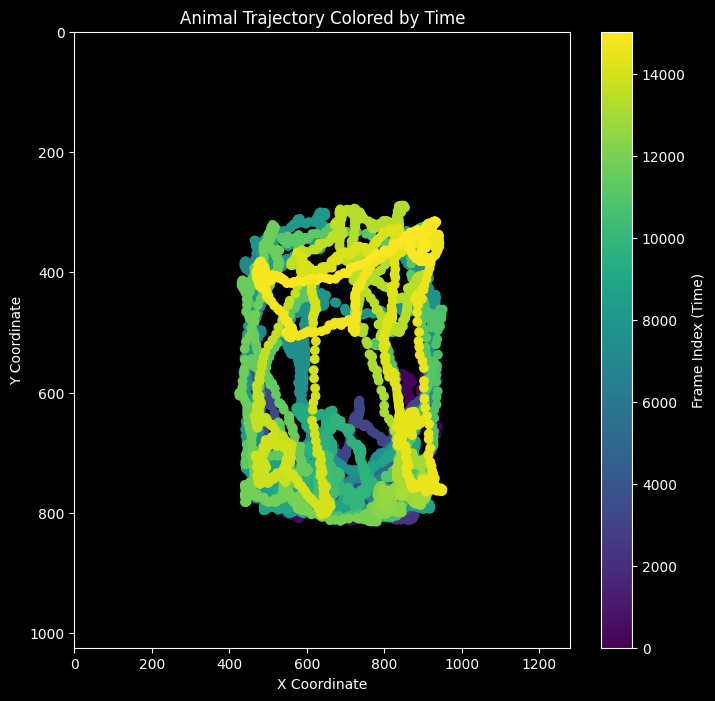

In [8]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.05 $
current total tokens 6802


To generate an occupancy plot using the animal center, we need to follow these steps:

1. Retrieve the keypoints data using the `get_keypoints()` method.
2. Extract the coordinates of the animal center keypoint.
3. Create a 2D histogram (occupancy plot) of the animal center coordinates.

Given the information provided, we can accurately answer the query using the available core APIs. Let's proceed to write the code.

Here is the function to generate the occupancy plot:

```python
def get_occupancy_plot(config: Config):
    """
    Generate an occupancy plot using the animal center keypoint.

    Parameters:
    ----------
    config: Config
        Configuration object for the analysis.
    
    Returns:
    -------
    tuple
        A tuple containing the figure and axes of the plot.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Retrieve keypoints data
    keypoints = analysis.get_keypoints()
    
    # Extract the coordinates of the animal center keypoint (assuming 'mouse_center' is the center)
    # The shape of keypoints is (n_frames, n_individuals, n_kpts, n_dims)
    center_index = analysis.get_keypoint_names().index('mouse_center')
    center_coords = keypoints[:, :, center_index, :2]  # Extract x and y coordinates
    
    # Flatten the coordinates for all frames and individuals
    x_coords = center_coords[:, :, 0].flatten()
    y_coords = center_coords[:, :, 1].flatten()
    
    # Create a 2D histogram (occupancy plot)
    fig, ax = plt.subplots()
    ax.hist2d(x_coords, y_coords, bins=50, cmap='Blues')
    
    # Invert y-axis to match the image coordinates
    ax.invert_yaxis()
    
    # Set plot limits to cover the whole image
    ax.set_xlim(0, 1280)
    ax.set_ylim(0, 1024)
    
    ax.set_title('Occupancy Plot using Animal Center')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    
    return fig, ax
```

This function will generate an occupancy plot using the animal center keypoint and return the figure and axes objects for further manipulation or display.

after executing the function


{'description': 'A single mouse viewed from the top in an enclosed space with a light-colored floor and darker walls. There are some objects on the left side of the image, including a syringe and other equipment.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['syringe', 'equipment']}

None


(<Figure size 800x800 with 1 Axes>, <Axes: title={'center': 'Occupancy Plot using Animal Center'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

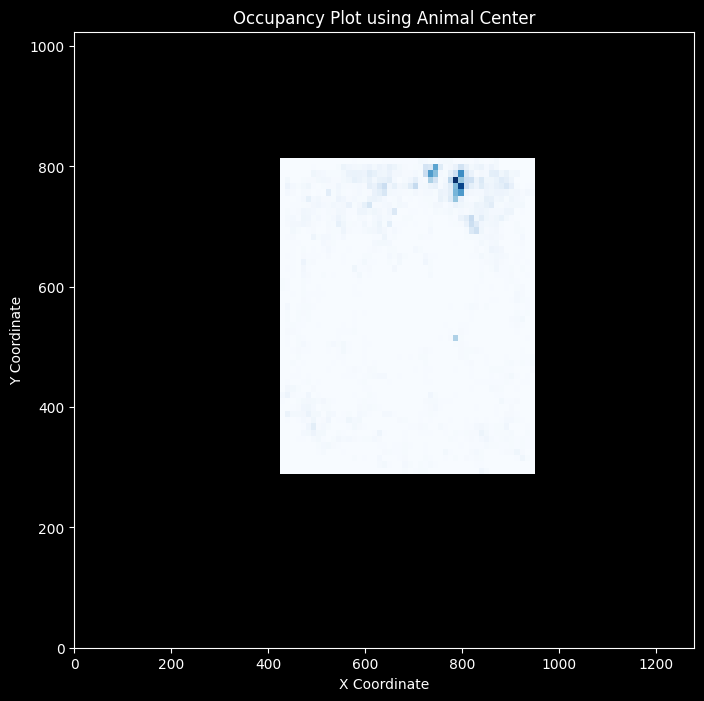

In [6]:
query = "give me the occupancy plot using the animal center"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)